<a href="https://colab.research.google.com/github/AkReposuiii/ML-labs/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Lab No. 13 </center><h1>

**Objective**: To apply k-means clustering algorihm to segment the customers for decision making

#### K-means Algorithms
- In Machine Learning, the types of Learning can broadly be classified into three types:
    1. Supervised Learning: having labelled dataset
    2. Unsupervised Learning: dataset without labels
    3. Re-inforcement learning

- Predicting new data points based on example is called **“supervised learning** whereas categorizing data into buckets is termed **“unsupervised learning”**.

- **An Example of Supervised Learning**, suppose we have a pizza chain and we’ve been tasked with creating a feature in the order management software that will predict delivery times for customers. In order to achieve this, we are given a dataset that has delivery times, distances traveled, day of week, time of day, staff on hand, and volume of sales for several deliveries in the past. From this data, we can make predictions on future delivery times. This is a good example of supervised learning.

- **An Example of Unsupervised Learning**, Now, let’s say the pizza chain wants to send out targeted coupons to customers. It wants to segment its customers into 4 groups: large families, small families, singles, and college students. We are given prior ordering data (e.g. size of order, price, frequency, etc) and we’re tasked with putting each customer into one of the four buckets. This would be an example of “unsupervised learning” since we’re not making predictions; we’re merely categorizing the customers into groups.

  
### Clustering defined
Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. **Similarity** is a metric that reflects the strength of relationship between two data objects.

### Application of Clustering
Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as:
- machine learning
- Text Analytics
- pattern recognition
- image analysis
- information retrieval
- bio-informatics
- data compression
- computer graphics, etc.

Types of clustering include
1. connectivity
2. centroid
3. distribution
4. density

## K-means Algorithm
K-Means falls under the category of **centroid-based clustering**. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.

In [2]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2 Importing the mall dataset
df= pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
len(df)

200

In [4]:
#Select the annual income and the spending score columns
X = df.iloc[:, [3,4]].values
X[0:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

We actually do not know the number of clusters. There are several methods to select k that depends on the domain knowledge and rule of thumbs. Elbow method is one of the robust one used to find out the optimal number of clusters. In this method, the sum of distances of observations from their cluster centroids, called Within-Cluster-Sum-of-Squares (WCSS). This is computed as

Yi is centroid for observation Xi. The below code performs this method.

In [8]:
# KMeans class from the sklearn library.
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )

In [10]:
kmeans.n_clusters

5

- We are going to use the fit predict method that returns for each #observation which cluster it belongs to.
- The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is called y_kmeans

In [11]:
y_kmeans = kmeans.fit_predict(X)

In [12]:
type(y_kmeans)

numpy.ndarray

In [13]:
# In some Tutorials, y_km is used instead of y_kmeans
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [14]:
df['cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [15]:
print(y_kmeans.shape)
print(y_kmeans.dtype)

(200,)
int32


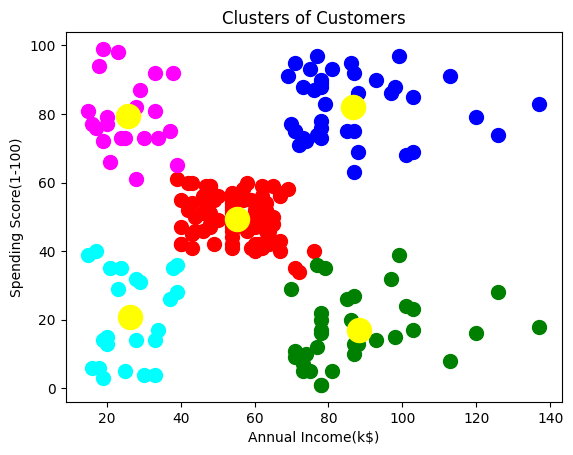

In [16]:
#6 Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

#Plot the centroid. This time we're going to use the cluster centres
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

Ultimately, we can define these clusters according to their annual income and spending scores. For instance, Cluster1 has high annual income and low spending score so that we can name it “Careful” and name the others in comparison with this appellation.
If you are doing clustering in more than two dimensions you don’t execute the last code section to visualize the clusters because it’s only for two-dimensional clustering. It is possible to use this code by using the dimension reduction technique. So if you reduce the dataset to two dimensions by these techniques then you can use this last code section to plot the clusters.

## K-means metrics
Any application of an algorithm is incomplete if one is not sure about its performance. Now, in order to know how well the K-Means algorithm is performing there are certain metrics to consider. Some of these metrics are:

1. Adjusted rand index
2. Mutual information based scoring
3. Homogeneity, completeness and v-measure

### Tasks
1. How to determine the number of clusters on any dataset
    - Using the elbow method to find out the optimal number of #clusters.
    - **init** parameter is the random #initialization method. we select **kmeans++** method.
    - **max_iter** parameter the maximum number of iterations there can be to find the final clusters when the K-means algorithm is running. we enter the default value of 300
    - **n_init** parameter indicates the number of times the **K_means algorithm** will run with different initial centroid
2. Explain different distance measuring methods for clustering
    - Euclidean
    - Jaccard
    - cosine
    - Manhatten